In [1]:
# WeatherPy

#---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #create endpoint URL with each city and replace and spaces with + symbol
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temperature (C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/sec)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | pelabuhanratu
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | tralee
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | aripuana
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | perrysburg
Processing Record 21 of Set 1 | toro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                   554
Latitude               554
Longitude              554
Max Temperature (C)    554
Humidity (%)           554
Cloudiness (%)         554
Wind Speed (m/sec)     554
Country                554
Date                   554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Country,Date
0,college,64.8569,-147.8028,-4.50,84,75,0.00,US,1698527978
1,bilibino,68.0546,166.4372,-22.35,97,32,0.95,RU,1698527978
2,pelabuhanratu,-6.9875,106.5514,24.57,87,37,1.86,ID,1698527978
3,atafu village,-8.5421,-172.5159,28.38,75,30,4.05,TK,1698527979
4,grytviken,-54.2811,-36.5092,-0.02,94,100,1.65,GS,1698527979


In [7]:
# Export the City_Data into a csv
current_directory = os.getcwd()
output_directory_name = "output_data"
directory_path = os.path.join(current_directory, output_directory_name)

if not os.path.exists(directory_path):
    os.makedirs(directory_path)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-4.50,84,75,0.00,US,1698527978
1,bilibino,68.0546,166.4372,-22.35,97,32,0.95,RU,1698527978
2,pelabuhanratu,-6.9875,106.5514,24.57,87,37,1.86,ID,1698527978
3,atafu village,-8.5421,-172.5159,28.38,75,30,4.05,TK,1698527979
4,grytviken,-54.2811,-36.5092,-0.02,94,100,1.65,GS,1698527979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

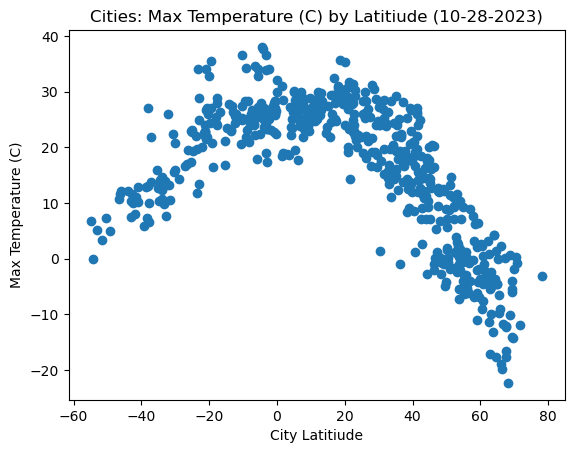

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temperature (C)'])

# Incorporate the other graph properties
current_date = datetime.date.today()
current_formatted_date = current_date.strftime("%m-%d-%Y")
plt.xlabel('City Latitiude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Cities: Max Temperature (C) by Latitiude ({current_formatted_date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

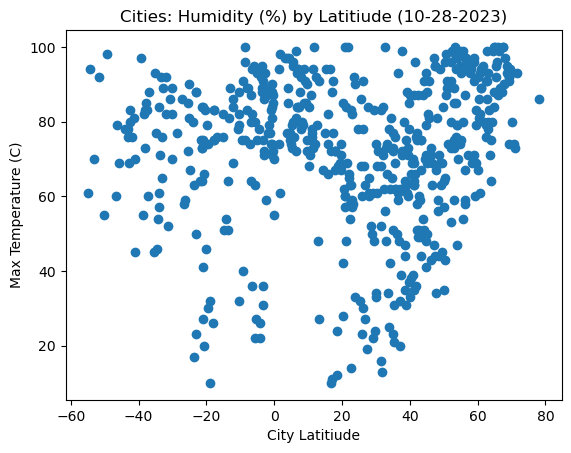

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity (%)'])

# Incorporate the other graph properties
current_date = datetime.date.today()
current_formatted_date = current_date.strftime("%m-%d-%Y")
plt.xlabel('City Latitiude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Cities: Humidity (%) by Latitiude ({current_formatted_date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

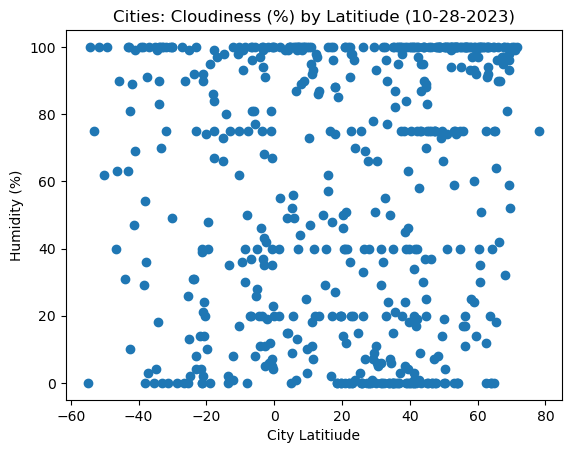

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness (%)'])

# Incorporate the other graph properties
current_date = datetime.date.today()
current_formatted_date = current_date.strftime("%m-%d-%Y")
plt.xlabel('City Latitiude')
plt.ylabel('Humidity (%)')
plt.title(f'Cities: Cloudiness (%) by Latitiude ({current_formatted_date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

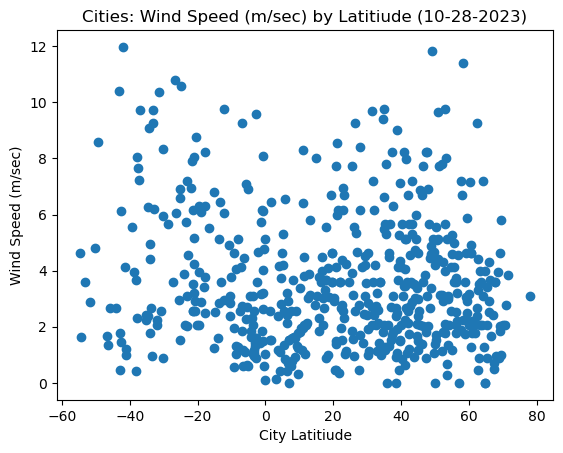

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed (m/sec)'])

# Incorporate the other graph properties
current_date = datetime.date.today()
current_formatted_date = current_date.strftime("%m-%d-%Y")
plt.xlabel('City Latitiude')
plt.ylabel('Wind Speed (m/sec)')
plt.title(f'Cities: Wind Speed (m/sec) by Latitiude ({current_formatted_date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
#define a function to create AND display scatterplots/linear regressions for specific data
def perform_linear_regression(df, x_column, y_column):
    x = df[x_column]
    y = df[y_column]

    #perform linear regression using linregress from scipy
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    #create the scatterplot from our values of interest
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, color='red')
    plt.xlabel(f'City {x_column}')
    plt.ylabel(f'City {y_column}')

    #format the linear equation, the r value, and the R-squared value for display readability
    formatted_slope = '{:.2f}'.format(round(slope, 2))
    formatted_intercept = '{:.2f}'.format(round(intercept, 2))
    formatted_r_value = '{:.2f}'.format(round(r_value, 2))
    formatted_r_squared = '{:.2f}'.format(round(r_value ** 2, 2))
    formula = f'y = {formatted_slope}x + {formatted_intercept}'
    
    #print all of the linear regression values of interest above the scatterplot and then the scatterplot with the linear regression line displayed below
    #this method was used in order to place both the linear regression calculation AND display output code in a single function and avoid having the displayed linear equation be covered by the scatterplot markers (as was the case in the Starter Code)
    print()
    print(f'R value is (correlation coefficient): {formatted_r_value}')
    print(f'R-squared value is: {formatted_r_squared}')
    print(f'Linear regression formula: {formula}')
    print()
    plt.tight_layout()
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-4.50,84,75,0.00,US,1698527978
1,bilibino,68.0546,166.4372,-22.35,97,32,0.95,RU,1698527978
5,aasiaat,68.7098,-52.8699,-10.23,93,81,3.95,GL,1698527979
6,tralee,52.2704,-9.7026,9.37,91,100,1.82,IE,1698527979
7,stanley,54.8680,-1.6985,9.29,95,40,2.57,GB,1698527979


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Country,Date
City_ID,,,,,,,,,
2,pelabuhanratu,-6.9875,106.5514,24.57,87,37,1.86,ID,1698527978
3,atafu village,-8.5421,-172.5159,28.38,75,30,4.05,TK,1698527979
4,grytviken,-54.2811,-36.5092,-0.02,94,100,1.65,GS,1698527979
12,lebu,-37.6167,-73.6500,10.02,83,91,7.65,CL,1698527980
13,aripuana,-9.1667,-60.6333,34.21,40,93,0.55,BR,1698527980


###  Temperature vs. Latitude Linear Regression Plot


R value is (correlation coefficient): -0.86
R-squared value is: 0.74
Linear regression formula: y = -0.60x + 36.20



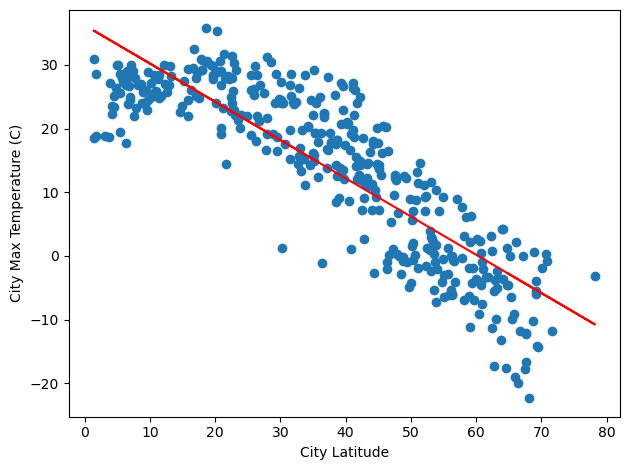

In [16]:
# Linear regression on Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Max Temperature (C)')


R value is (correlation coefficient): 0.80
R-squared value is: 0.63
Linear regression formula: y = 0.42x + 29.64



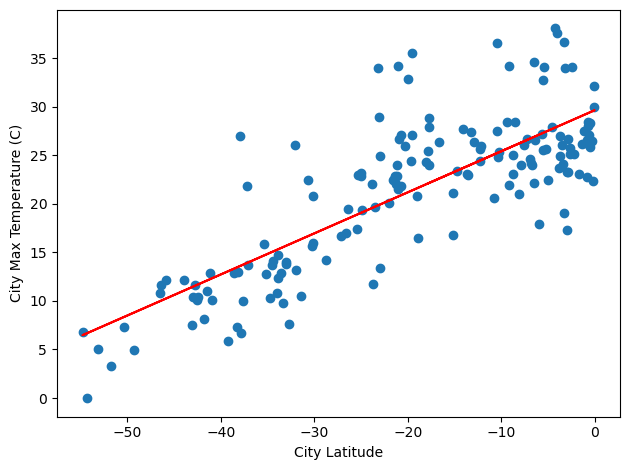

In [17]:
# Linear regression on Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:** There is a moderate positive linear relationship between temperature and latitude for the southern hemisphere during this time of year (as you move closer to the equator, the temperature tends to be higher). Generally speaking, the equator should always be the warmest point on earth on average, given it gets the most direct sunlight all year. The fact the the southern hemisphere is entering summer may be contributing to the weaker linear relationsip as compared to the northern hemisphere, which is now approaching winter (there is a less dramatic difference in temperature over most latitudes until you reach very southern latitudes at this point in the year). There are also fewer cities at far southern latitudes from which to draw data, which may be affecting our linear equation. You'll notice that the x axis cutoff for the southern hemisphere is around -55 degrees, while in the northern hemisphere we have data points for cities as far north as ~80 degrees. 

There is a strong negative linear relationship between temperature and latitude for the northern hemisphere during this time of year (as you move away from the equator, the temperature tends to be become much lower rather quickly). The fact the the northern hemisphere is entering winter may be contributing to the stronger linear relationsip as compared to the southern hemisphere, which is now approaching summer (there is a more dramatic difference in temperature over latitude for all northern latitudes at this point in the year).

### Humidity vs. Latitude Linear Regression Plot


R value is (correlation coefficient): 0.17
R-squared value is: 0.03
Linear regression formula: y = 0.18x + 64.91



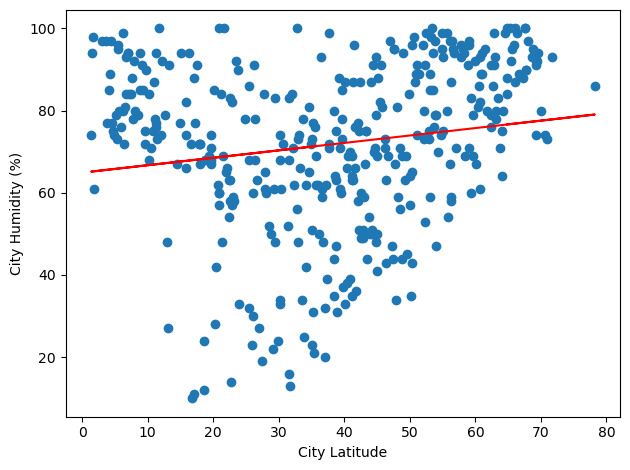

In [18]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Humidity (%)')


R value is (correlation coefficient): 0.00
R-squared value is: 0.00
Linear regression formula: y = 0.00x + 71.54



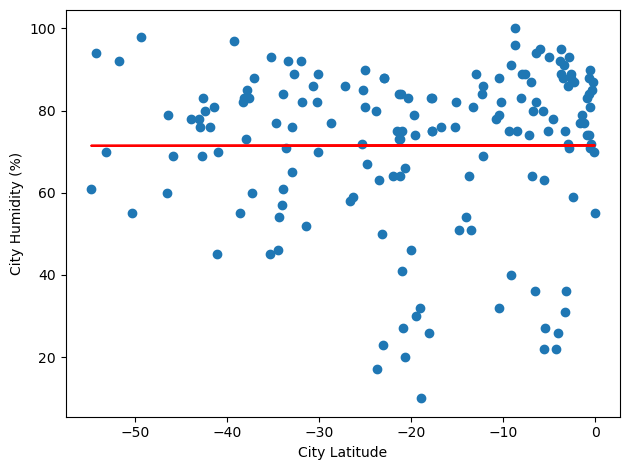

In [19]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** There is essentially no linear relationship between humidity and latitude for either hemisphere. There is an extremely weak positive relationship for the northern hemisphere (humidity increases as you move away from the equator), but appears too weak to be of note. This is not suprising, since humidity is strongly influenced by local geographic features and microclimates that can occur all over the globe independent of latitiude (e.g., being in an arid biome vs a rainforest).

### Cloudiness vs. Latitude Linear Regression Plot


R value is (correlation coefficient): 0.17
R-squared value is: 0.03
Linear regression formula: y = 0.37x + 43.88



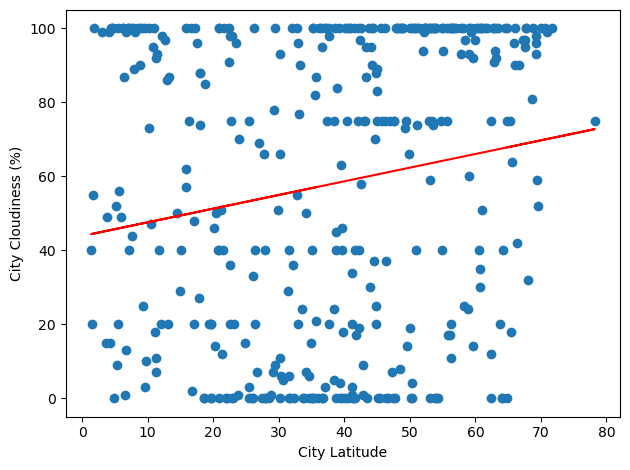

In [20]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Cloudiness (%)')


R value is (correlation coefficient): -0.12
R-squared value is: 0.01
Linear regression formula: y = -0.29x + 49.71



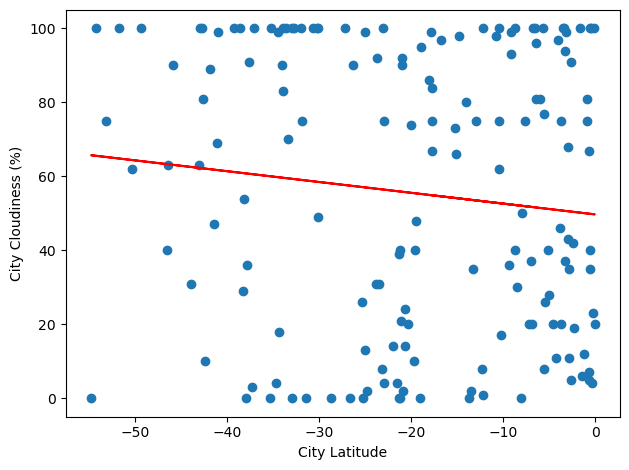

In [21]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** There is essentially no linear relationship between cloudiness and latitude for either hemisphere. There is an extremely weak positive relationship in the northern hemisphere, but it is too weak to be of note. This is not suprising, since cloud cover has little to do with latitiude for any specific point in time.

### Wind Speed vs. Latitude Linear Regression Plot


R value is (correlation coefficient): 0.06
R-squared value is: 0.00
Linear regression formula: y = 0.01x + 3.11



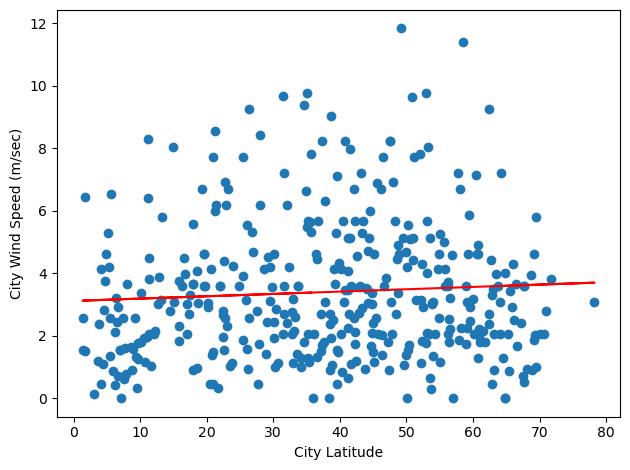

In [22]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Wind Speed (m/sec)')


R value is (correlation coefficient): -0.21
R-squared value is: 0.04
Linear regression formula: y = -0.04x + 3.25



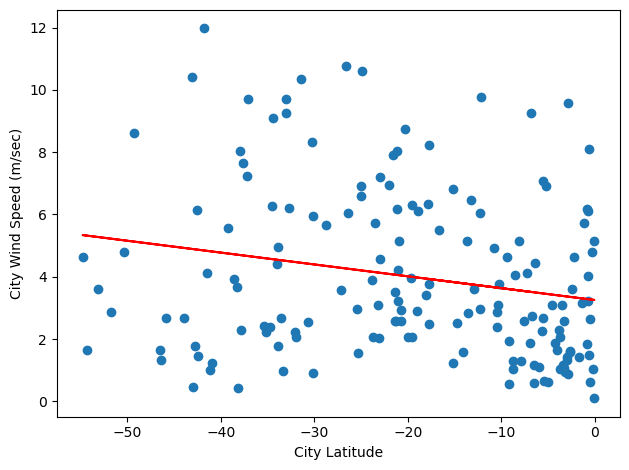

In [23]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Wind Speed (m/sec)')

**Discussion about the linear relationship:** There is essentially no linear relationship between wind speed and latitude for either hemisphere. This is not suprising, since wind speed is strongly influenced by local geographic features and microclimates that can occur all over the globe independent of latitiude (e.g., being in a region experiencing a hurricane vs a calm day).